In [72]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [73]:
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [74]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
diabetes_df.shape

(768, 9)

In [76]:
X = diabetes_df.drop("glucose",axis=1).values

In [77]:
# X = dataframe.drop("stroke",axis=1).values
y = diabetes_df["glucose"].values

In [78]:
print(type(X),type(y))
print(y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(768,)


In [79]:
X_bmi =X[:,6]

In [80]:
X_bmi = X_bmi.reshape(-1, 1)


In [81]:
# #checking shapes to work fine
# y.reshape(-1,1)
# print(y.shape)

C:\Users\bisha\AppData\Local\Temp\ipykernel_11644\2117967383.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


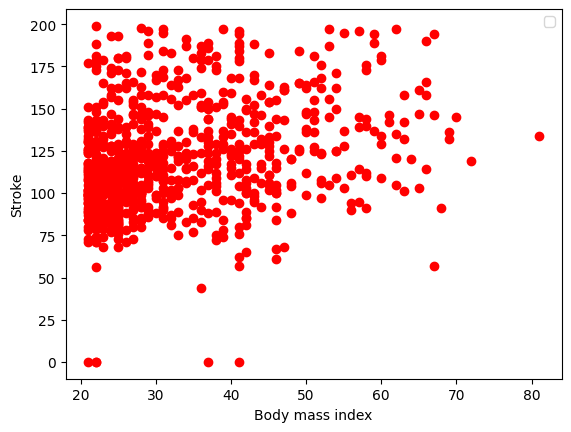

In [82]:
plt.scatter(X_bmi,y,c='r')
plt.xlabel("Body mass index")
plt.ylabel("Stroke")
plt.legend()
plt.show()

In [83]:
reg = LinearRegression()
reg.fit(X=X_bmi,y=y)
prediction = reg.predict(X_bmi)

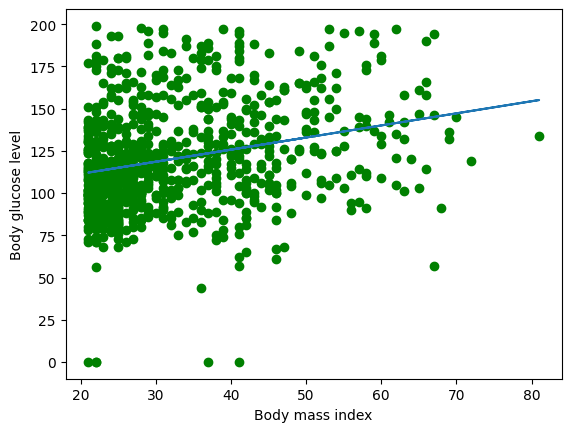

In [84]:
plt.scatter(X_bmi,y, c='green')
plt.plot(X_bmi,prediction)
plt.xlabel("Body mass index")
plt.ylabel("Body glucose level")
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

0.28280468810375115

In [87]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)


26.341459582232265

# Rige Regression 

In [88]:
from sklearn.linear_model import Ridge, Lasso
scores = []
limit = [0.01, 0.1, 1, 10, 100,1000]
for alpha in limit:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
print(scores)

[0.2828089039524213, 0.28284666232222233, 0.28320633574804766, 0.2853000732200003, 0.26423984812668155, 0.19292424694100963]


C:\Users\bisha\AppData\Local\Temp\ipykernel_11644\2765198106.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


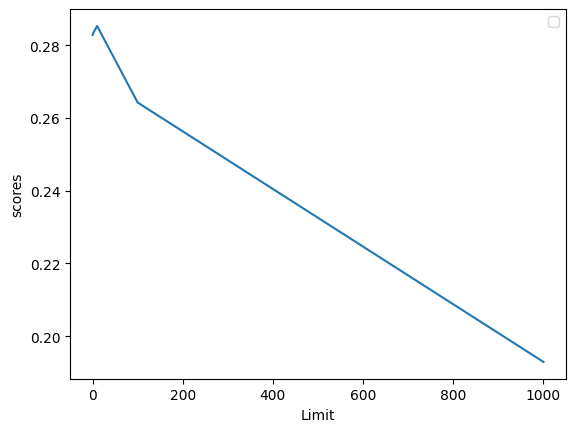

In [89]:
plt.plot(limit,scores)
plt.xlabel("Limit")
plt.ylabel("scores")
plt.legend()
plt.show()

# Lasso Regression

In [90]:
scores = []
limit = [0.01, 0.1, 1, 10, 100,1000]
for alpha in limit:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)

[0.2831114455475573, 0.28575325694826237, 0.29795609755827845, 0.17989838789273893, 0.10438614467572016, 0.04044144424693341]


C:\Users\bisha\AppData\Local\Temp\ipykernel_11644\2765198106.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


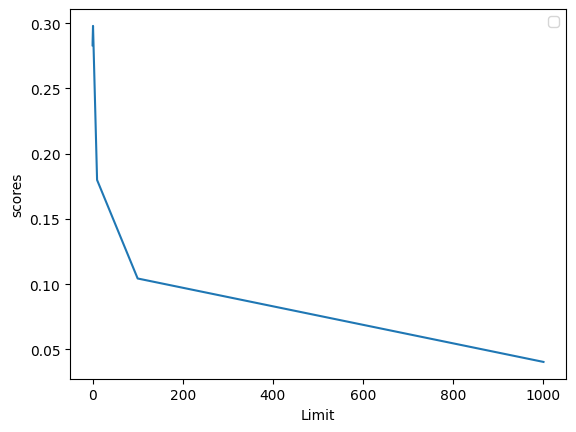

In [91]:
plt.plot(limit,scores)
plt.xlabel("Limit")
plt.ylabel("scores")
plt.legend()
plt.show()

# Lasso for feature selection in Scikit-learn

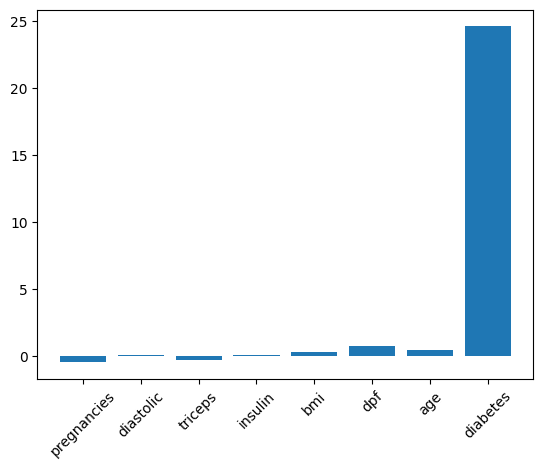

In [92]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()
